# Data Story

Thinking intuitely about the Spotify data and song popularity in general, it seems apparent that clear cut correlations between a song's features and its popularity will be difficult to discern. Two songs may be structured very similarly, and yet may have entirely different popularity scores. On the other side of the coin, two songs with the same popularity score may sound completely different. One song may be fast and the other slow; one may be loud while the other not so much. While pop music may seem rather formulaic to many, cultural tastes are fickle and no one can say for certain which songs will make the cut.<br>
<br>
With these caveats in mind, let's see what the data says visually.

### Load in the data and packages

In [9]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
# See data wrangling report for more details
#load data
spotify = pd.read_csv('../Data/SpotifyFeatures0419.csv')

# Create the sorted dataframe and drop zeros
sort_data = spotify.sort_values('popularity', ascending=False).reset_index()
spotify_ordered = sort_data.drop(['index', 'track_id'], axis=1)
spotify_ordered.index = spotify_ordered.index + 1
spotify_ordered = spotify_ordered[spotify_ordered.popularity > 0]
spotify_ordered[['mode', 'key', 'time_signature']] = \
    spotify_ordered[['mode', 'key', 'time_signature']].astype('category')

In [6]:
# Create dataframe with encoded categorical variables
encoded = spotify_ordered.drop('track_name', axis=1)
encoded = pd.get_dummies(encoded)

(111774, 29833)

In [23]:
#Create table with a column classifying popularity ratings
classified = spotify_ordered.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

### Initial Glance
As the data wrangling report shows, popular songs compared to the entire population are extremely rare, and the ratio between popular and unpopular is severely disproportionate.

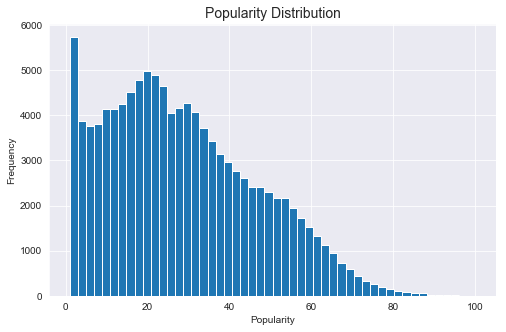

In [12]:
# Inspect shape of popularity variable
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = spotify_ordered['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

The tail towards the upper end of the scale is very narrow.

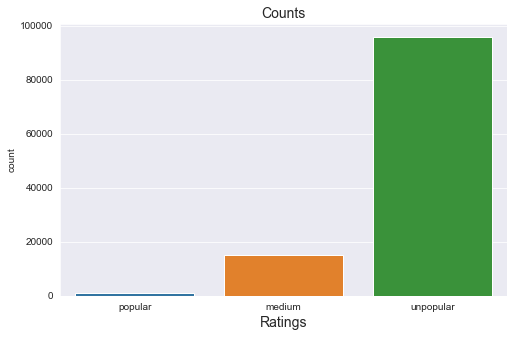

In [15]:
# simple count of the ratings
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

This really drives home the disparity.

### Correlations
First, let's take a look at the correlation coefficients for the data features, and use a correlation heat map to help visualize how the different variables relate to each other.

In [24]:
# Generat correlation table
spotify_ordered.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.359877,0.049087,-0.737737,0.320986,-0.113883,-0.631248,-0.125848,-0.218866,-0.182997,-0.152114
danceability,-0.359877,1.000000,-0.147489,0.294570,-0.341741,-0.119567,0.443299,0.251208,0.063790,0.457178,0.194267
duration_ms,0.049087,-0.147489,1.000000,-0.041508,0.073682,-0.006783,-0.049664,-0.115628,-0.017789,-0.157237,-0.038537
energy,-0.737737,0.294570,-0.041508,1.000000,-0.336212,0.205073,0.782896,0.111446,0.235635,0.323009,0.151448
instrumentalness,0.320986,-0.341741,0.073682,-0.336212,1.000000,-0.070851,-0.527086,-0.213433,-0.099311,-0.282644,-0.201522
liveness,-0.113883,-0.119567,-0.006783,0.205073,-0.070851,1.000000,0.072658,0.114989,0.001880,0.011129,-0.039396
loudness,-0.631248,0.443299,-0.049664,0.782896,-0.527086,0.072658,1.000000,0.072990,0.227240,0.329304,0.272248
speechiness,-0.125848,0.251208,-0.115628,0.111446,-0.213433,0.114989,0.072990,1.000000,0.050433,0.129835,0.009084
tempo,-0.218866,0.063790,-0.017789,0.235635,-0.099311,0.001880,0.227240,0.050433,1.000000,0.096504,0.046398
valence,-0.182997,0.457178,-0.157237,0.323009,-0.282644,0.011129,0.329304,0.129835,0.096504,1.000000,0.045007


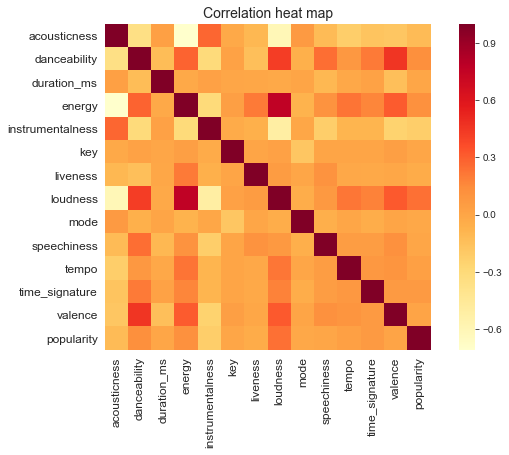

In [22]:
# Generate heat map using seaborn
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.heatmap(spotify.corr(), square=True, cmap='YlOrRd')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

The thing that jumps out right away is that the majority of correlations look pretty weak. Energy, loudness and danceability have fairly strong relationships, which makes sense, and acousticness is naturally opposed to loudness and energy, but there's not much to go on outside of those. Unfortunately, this trend appears to hold true for the popularity variable. 

### Further exploring variable relationships
First, let's create a couple functions that can be used to generate multiple scatterplots

In [52]:
def scat_plot(x, y, hue=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x, y, hue=hue, s=12)
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.legend(fontsize=12)
    plt.show()
    
    
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line
    using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x, y, data=data, scatter_kws={"s": 10}, line_kws={'color':'r'})
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.ylim(-3, 103)
    plt.show()
    

From the table above, loudness has the strongest correlation to popularity. Let's visualize it further. 

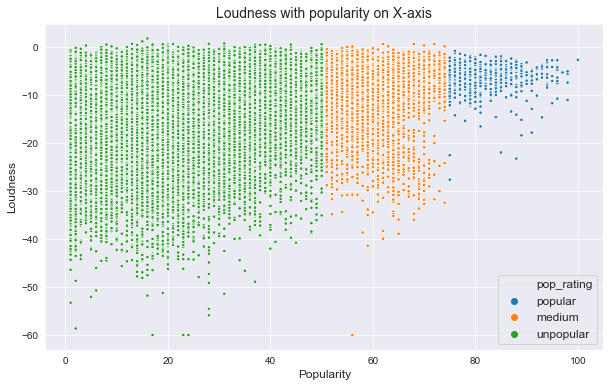

In [37]:
s = spotify_ordered

# Use the scat_plot function to plot loudness against popularity
scat_plot(s.popularity, s.loudness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

The plot above shows the distribution of loudness with popularity on the X-axis. It shows that the highest values of loudness can be found acoss the popularity spectrum, but as the X-axis increases the groupings become more and more concentrated toward the top. In other words, loudness doesn't guarantee popularity, but low levels of loudness seem to preclude popularity.

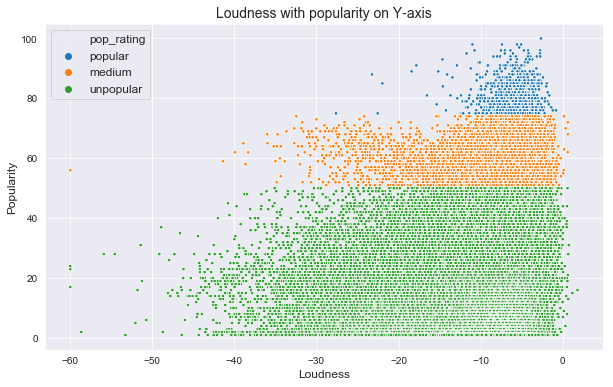

In [39]:
# Flip the axes and revisualize
scat_plot(s.loudness, s.popularity, hue=classified.pop_rating, xlab='Loudness',\
         ylab='Popularity', titl='Loudness with popularity on Y-axis')

<b>Regression line</b><br>
Now plot the data with the regression line using the regress_plot function defined earlier.

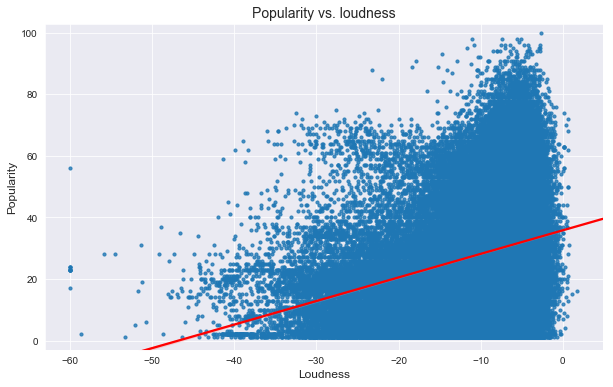

In [53]:
regress_plot('loudness', 'popularity', data=s, xlab='Loudness',\
         ylab='Popularity', titl='Popularity vs. loudness')

As indicated by the correlation table, the plots display the positive relationship between loudness and popularity.

<b>Comparing other features</b><br>
Let's see what insights some of the other variables provide.

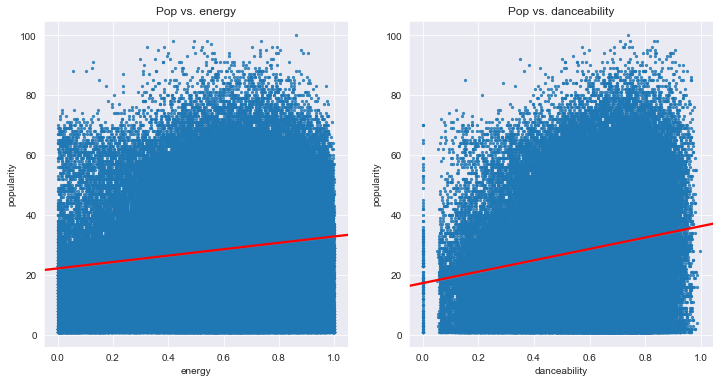

In [59]:
# Subplots with energy and danceability
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
_ = sns.regplot(s.energy, s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. energy')

ax2 = plt.subplot(1,2,2)
_ = sns.regplot(s.danceability, s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. danceability')

The above subplots show other variables with a slightly positive correlation. Let's see some of the more negatively related variables. 

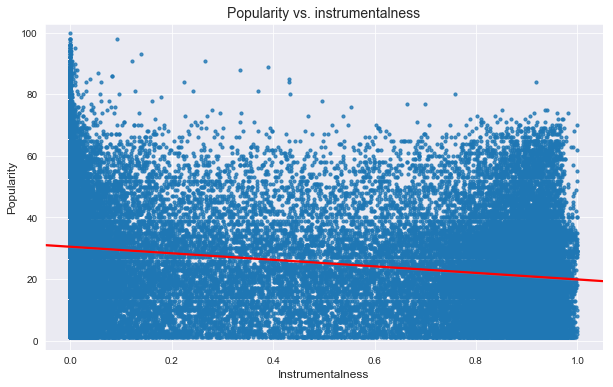

In [60]:
regress_plot('instrumentalness', 'popularity', data=s, xlab='Instrumentalness',\
         ylab='Popularity', titl='Popularity vs. instrumentalness')

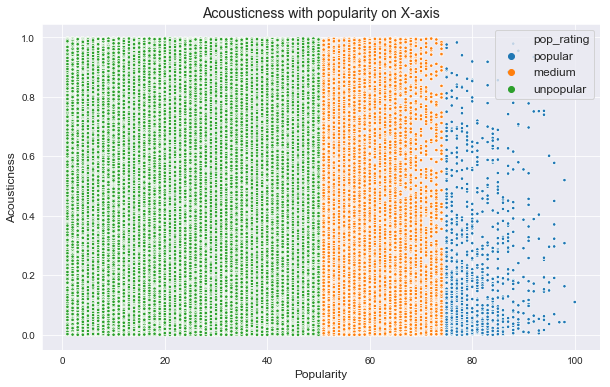

In [61]:
# Use scat_plot function to compare acousticness
scat_plot(s.popularity, s.acousticness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Acousticness', titl='Acousticness with popularity on X-axis')

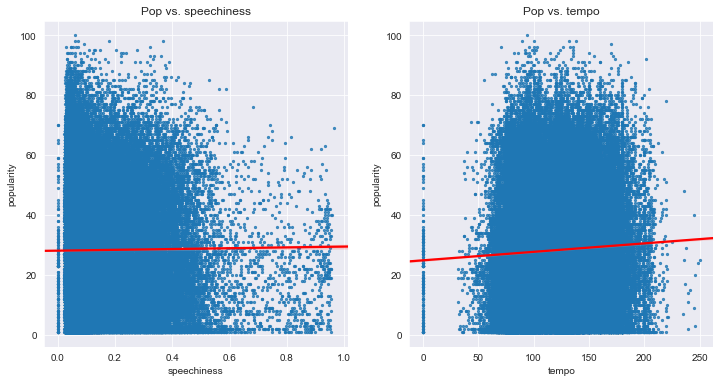

In [62]:
# Subplots with speechiness and tempo
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
_ = sns.regplot(s.speechiness, s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. speechiness')

ax2 = plt.subplot(1,2,2)
_ = sns.regplot(s.tempo, s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. tempo')

One thing to mention for some of these regression plots is that a linear line might not be the best fit for many of them, or perhaps even all of them. For example, the plot for tempo above has more of a parabolic shape indicating a sort of sweet spot. We also see several observations with no tempo, or other features with zero values. This might seem odd at first, but Spotify does have spoken word tracks, like stand-up comedy for example, that might not register under certain features. However these can still be popular, so they will not be removed.<br>
<br>
Another thing all of these plots have in common is a large amount of variance. Even the plots that display some type of correlation, be it positive or negative, have a broad sprectrum of residuals. Singularly, none of the features have a strong fit, at least not linearly. But, perhaps collectively there's enough information to determine what is popular. That is what the models will tell us later.

### Popular songs grouped by artist

Previous success can indicate future success. Here we create a new dataframe, compare, that contains info on all artists that have scored at least one song with a popularity of at least 75. Also looked at is the question of how often popular songs occur as a ratio of total output. 

In [78]:
#Subset the data for only songs with popularity over 75 and count the number of tracks each artist had
#fitting this criteria. This will give a total count of 'popular' songs for each artist.
pop_artists = s[s['popularity'] > 75].groupby('artist_name').count().sort_values('track_name', ascending=False)
pop_artists = pop_artists.iloc[:,:1]
pop_artists.columns = ['total_pop_tracks']
pop_artists.head()

,total_pop_tracks
artist_name,
Khalid,24
Juice WRLD,23
Ariana Grande,19
Post Malone,18
Billie Eilish,17


In [79]:
# Create a new dataframe for the total output of strictly artists who
# have had at least one popular song
x = list(pop_artists.index)

pop_full_catalog = pd.DataFrame()
for name in x:
    pop_full_catalog = pop_full_catalog.append(s[s['artist_name'] == name])
    
pop_full_catalog.shape

(5571, 16)

In [80]:
# Count the total number of tracks for each popular artist
pop_total_count = pop_full_catalog.groupby('artist_name').count().sort_values('track_name', ascending=False)
pop_total_count = pop_total_count.iloc[:,:1]
pop_total_count.columns = ['total_tracks']
pop_total_count.head()

,total_tracks
artist_name,
YoungBoy Never Broke Again,75
Mike Posner,56
Future,56
R3HAB,54
Steve Aoki,52


In [83]:
# Compute the ratio for popular tracks compared to total tracks
# Create a new dataframe to show this info and sort by total_pop_tracks
compare = pd.concat([pop_artists, pop_total_count], axis=1, sort=False)
compare['popular_ratio'] = compare.total_pop_tracks / compare.total_tracks
compare = compare.sort_values('total_pop_tracks', ascending=False)
compare.head(10)

,total_pop_tracks,total_tracks,popular_ratio
Khalid,24,38,0.631579
Juice WRLD,23,44,0.522727
Ariana Grande,19,34,0.558824
Post Malone,18,30,0.600000
Billie Eilish,17,22,0.772727
Bad Bunny,14,23,0.608696
Ozuna,12,29,0.413793
6ix9ine,11,31,0.354839
XXXTENTACION,10,35,0.285714
Bazzi,8,19,0.421053


<b>Plot data and look for correlations</b>

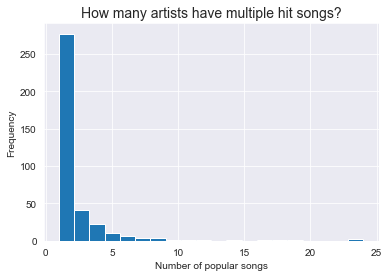

In [74]:
# Histogram for number of popular songs per artist
_ = plt.hist(compare.total_pop_tracks, bins=20)
_ = plt.xlabel('Number of popular songs')
_ = plt.ylabel('Frequency')
_ = plt.title('How many artists have multiple hit songs?', fontsize=14)

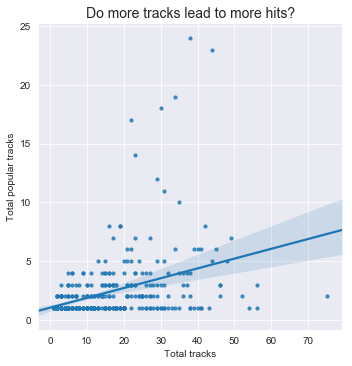

In [76]:
_ = sns.lmplot(x='total_tracks', y='total_pop_tracks', data=compare, scatter_kws={"s": 10})
_ = plt.xlabel('Total tracks')
_ = plt.ylabel('Total popular tracks')
_ = plt.title('Do more tracks lead to more hits?', fontsize=14)

<b>Observations:</b><br>
-Looking at the previous few cells, there seems to be a good bit of variability among total tracks for popular artists. The ratio of popular tracks to total tracks also varies widely.<br>
-There are quite a few artists with a ratio of 100%.<br>
-The artist with the most popular tracks tend to have fairly high ratios, perhaps reinforcing the idea that the best indicator of creating a new hit song is to already have an old hit song.<br>